In [4]:
from dataset_functions import *

from scipy.stats import pearsonr
os.makedirs('plots/WOC', exist_ok=True)

## Scores vs c

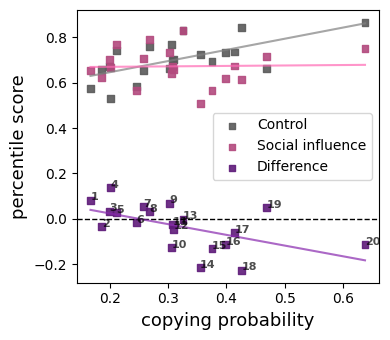

[0.16602588216625538, 0.1857012929283007, 0.19842657626898189, 0.2009730600674858, 0.2108736233953797, 0.24440748114633912, 0.2569738122343131, 0.26682007598319574, 0.30187937323720765, 0.3056724531203221, 0.30730400585054085, 0.3092624804133052, 0.32518960690859106, 0.3546575035940948, 0.37515351351520543, 0.39892253489770624, 0.41446583241833, 0.42665646051431605, 0.4688676378732065, 0.6384077006535759]
Pearson correlation: -0.549, p-value: 0.0122


In [5]:
f, ax = plt.subplots(1, 1, figsize=(4, 3.5))
base=dict(
    acc=(0, 1),
    mae=True,
    weighted=0,
    equaldots=True,
    fit_on="means",
    show_fit=True,
    show_tasks=False,
    fit_label=False,
    ylabel_fontsize=13,
    xlabel_fontsize=13,
    label_alpha=0.7,
    label_fontsize=8,
    grid_option=False,
    alpha_grid=0,
    ylabel='percentile score',
    return_data=True,
)
a = plot_ctrl_cons_diff_vs_mu_c(
    base=base, title=None, ax=ax, 
    )

plt.tight_layout()
plt.savefig('plots/WOC/WOC_error_per_c.png', dpi=300)
plt.show()
plt.close()

arr1 = a["difference"]["Y_means"]
arr2 = sorted(list(c_per_domain.values()))
print(arr2)
assert len(arr1) == len(arr2), "Arrays must be of the same length for correlation. Now arr1 has length {} and arr2 has length {}.".format(len(arr1), len(arr2))
correlation, p_value = pearsonr(arr1, arr2)
print(f"Pearson correlation: {correlation:.3f}, p-value: {p_value:.4f}")

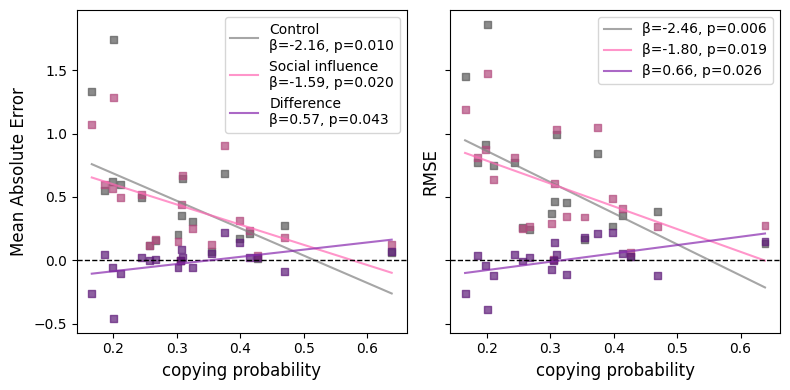

{'slope': np.float64(-1.591281683575363), 'intercept': np.float64(0.9179317279399946), 'p_value': np.float64(0.020286775646000982), 'r_squared': np.float64(0.26470359703793417)}
{'slope': np.float64(0.5678837870531784), 'intercept': np.float64(-0.19934546588089877), 'p_value': np.float64(0.04310994589782471), 'r_squared': np.float64(0.20828328512265706)}
{'slope': np.float64(-1.7975793161699152), 'intercept': np.float64(1.1457257155692573), 'p_value': np.float64(0.019396656974059387), 'r_squared': np.float64(0.26798209854838057)}
{'slope': np.float64(0.6589620843452131), 'intercept': np.float64(-0.2089633642056746), 'p_value': np.float64(0.026074570998671335), 'r_squared': np.float64(0.24618882823138502)}


In [6]:
foo = lambda d: np.array(d['absolute_error'])/d['std_dev']
f, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)
base=dict(
    acc=(0, 1),
    mae=True,
    weighted=0,
    equaldots=True,
    fit_on="means",
    show_fit=True,
    show_tasks=False,
    fit_label=True,
    ylabel_fontsize=12,
    xlabel_fontsize=12,
    label_alpha=0.7,
    label_fontsize=8,
    grid_option=False,
    alpha_grid=0,
    ylabel='Mean Absolute Error',
    alpha_mean=0.7,
    annotate_domain_means=False,
    title=None,
    joint_labels=True,
    return_data=True,
)

ret1 = plot_ctrl_cons_diff_vs_mu_c(
    func_y=foo,
    base=base, title=" ", ax=ax[0])
ret2 = plot_ctrl_cons_diff_vs_mu_c(
    func_y=foo,
    base={**base, 'mae': False, 'ylabel': 'RMSE', 'joint_labels': False, 'label':None}, ax=ax[1])

plt.tight_layout()
plt.savefig('plots/WOC/error_metrics_vs_mu_c.png', dpi=300)
plt.show()
plt.close()

print(ret1["consensus"]["fitting"])
print(ret1["difference"]["fitting"])
print(ret2["consensus"]["fitting"])
print(ret2["difference"]["fitting"])

## Last median update

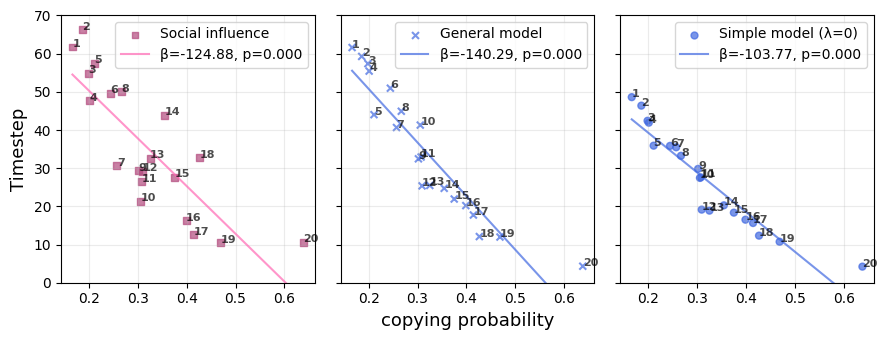

R^2 of general model: 0.678
R^2 of simple model: 0.450


In [4]:
f, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True, sharex=True)
base=dict(
    title=None,
    show_tasks=0,
    fit_label=1,
    label_fontsize=8,
    s_mean=25,
    fit_on='means',
    alpha_mean=0.7,
    xlabel_fontsize=13,
    ylabel_fontsize=13,
    )

res0 = plot_tasks_vs_mu_c(**base, 
                   func_y=lambda d: d['last_median_update'][1],
                   ylabel='Timestep', xlabel=None,
                   ax=ax[0], color=palette['Consensus'], label="Social influence",
                   return_data=True)

res1 = plot_tasks_vs_mu_c(**base,
                   func_y=lambda d: d['last_update_sims_domain'],
                    ylabel=None,
                    label="General model",
                    ax=ax[1],
                    marker_mean='x',
                    color='royalblue',
                    color_mean="royalblue",
                    return_data=True
)

res2 = plot_tasks_vs_mu_c(**base,
    func_y=lambda d: d['last_update_sims_lambda_zero'],
    ylabel=None, xlabel=None,
    label='Simple model (λ=0)',
    ax=ax[2],
    marker_mean='o',
    color='royalblue',
    color_mean="royalblue",
    return_data=True
)

ax[0].set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('plots/WOC/convergenceTime.png', dpi=300)
plt.show()
plt.close()

# print(res1["fitting"], res2["fitting"])
def r2_model_to_real(Y1, Y2):
    """
    R^2_model→real = 1 - sum (Y1 - Y2)^2 / sum (Y1 - mean(Y1))^2
    """
    y = np.asarray(Y1, dtype=float)
    yhat = np.asarray(Y2, dtype=float)

    # drop NaNs pairwise if needed
    mask = np.isfinite(y) & np.isfinite(yhat)
    y = y[mask]
    yhat = yhat[mask]

    sse = np.sum((y - yhat) ** 2)
    sst = np.sum((y - np.mean(y)) ** 2)

    # handle constant Y1 (sst=0)
    if sst == 0:
        return np.nan  # or 0.0 if you prefer

    return 1.0 - sse / sst

R2_full = r2_model_to_real(res0["Y_means"], res1["Y_means"])
R2_simple = r2_model_to_real(res0["Y_means"], res2["Y_means"])
print(f"R^2 of general model: {R2_full:.3f}")
print(f"R^2 of simple model: {R2_simple:.3f}")

## Accurate starts

In [7]:
def start_cuttoff(w=0, *, ps = [0.1, 0.25, 0.5], common_kwargs=None, ax=None, label=None):
    """
    common_kwargs: dict of keyword args passed into plot_tasks_vs_mu_c for every subplot.
                  Per-subplot overrides (acc, ax, title, etc.) will still be applied.
    """
    if common_kwargs is None:
        common_kwargs = {}

    if ax is None:
        f, ax = plt.subplots(len(ps), 3, figsize=(15, 4*len(ps)), sharey=True, sharex=True)
    
    ax = ax.reshape(len(ps), 3)

    ax[0][0].set_ylim(0, 1.1)

    # defaults shared across all calls (you can override any via common_kwargs)
    base = dict(
        mae=1,
        ylabel=None,
        xlabel=None,
        alpha_task=0.4,
        alpha_mean=0.8,
        show_tasks=True,
        show_means=True,
        annotate_domain_means=True,
        equaldots=1,
        s_task=8,
        s_mean=20,
        label_fontsize=8,
        fit_on="all",
        show_fit=True,
        weighted=bool(w),
        grid_option='y',
        alpha_grid=0.2,
    )
    base.update(common_kwargs)

    for i, p in enumerate(ps):
        panels = [
            ((0, p),     ax[i][0], f"({0:.2f}, {p:.2f}]"),
            ((p, 1 - p), ax[i][1], f"({p:.2f}, {1-p:.2f}]"),
            ((1 - p, 1), ax[i][2], f"({1-p:.2f}, {1:.2f}]"),
        ]

        for acc_rng, ax_ij, ttl in panels:
            plot_tasks_vs_mu_c(
                **base,
                acc=acc_rng,
                ax=ax_ij,
                title=ttl,
                label=label if i == 0 and ax_ij == ax[0][0] else None,
            )

        if i != len(ps) - 1:
            for j in range(3):
                ax[i][j].set_xlabel("")

        for j in range(1,3):
            ax[i][j].set_ylabel("")

    plt.tight_layout()
    # plt.show()



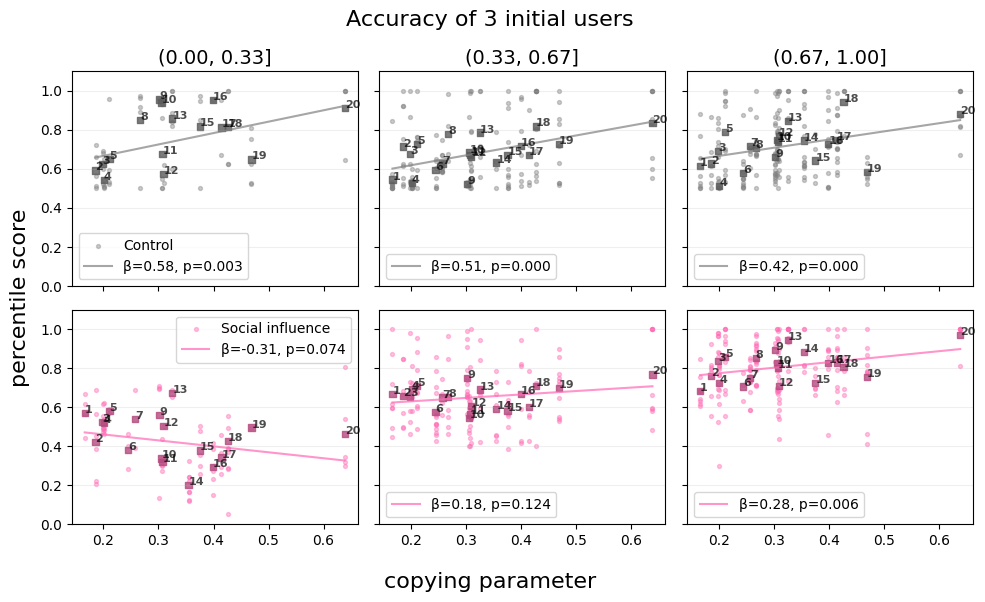

Tasks per bin in the control
[0, 0.33]: 61
(0.33, 0.67]: 155
(0.67, 1]: 183 

Tasks per bin in the social influence condition
[0, 0.33]: 77
(0.33, 0.67]: 150
(0.67, 1]: 172


In [8]:
f, ax = plt.subplots(2, 3, figsize=(10, 6), sharey=True, sharex=True)
start_cuttoff(w=0, ps=[1/3], 
              common_kwargs={'func_y': lambda d: d['scores'][0], 'color': palette["Control"], 'condition': 0}, 
              ax=ax[0], label="Control")
start_cuttoff(w=0, ps=[1/3], 
              common_kwargs={'func_y': lambda d: d['scores'][1], 'color': palette['Consensus'], 'condition': 1}, 
              ax=ax[1], label="Social influence")

for axis in ax[1]:
    axis.set_title(None)

# set common y-label
f.supylabel('percentile score', fontsize=16)
f.supxlabel('copying parameter', fontsize=16)

plt.suptitle("Accuracy of 3 initial users", y=0.98, fontsize=16)
plt.tight_layout()
plt.savefig('plots/WOC/initial_accuracy_0.33.png', dpi=300)
plt.show()

# tasks in each bin
print(f"Tasks per bin in the control")
print("[0, 0.33]:", sum(1 for t in task_params_dict if task_params_dict[t]['starting_accuracy'][0] <= 1/3))
print("(0.33, 0.67]:", sum(1 for t in task_params_dict if 1/3 < task_params_dict[t]['starting_accuracy'][0] <= 2/3))
print("(0.67, 1]:", sum(1 for t in task_params_dict if task_params_dict[t]['starting_accuracy'][0] > 2/3), "\n")

print(f"Tasks per bin in the social influence condition")
print("[0, 0.33]:", sum(1 for t in task_params_dict if task_params_dict[t]['starting_accuracy'][1] <= 1/3))
print("(0.33, 0.67]:", sum(1 for t in task_params_dict if 1/3 < task_params_dict[t]['starting_accuracy'][1] <= 2/3))
print("(0.67, 1]:", sum(1 for t in task_params_dict if task_params_dict[t]['starting_accuracy'][1] > 2/3))

In [9]:
def initial_final_accuracy_scatter_plot(condition, ax=None, bounds=[0, 1/3, 2/3, 1], size=30, alpha=0.5,
                                        colormap_name='Spectral', plot_colormap=True, cax=None):
    """
    Scatter plot of initial vs final accuracy for all tasks.
    Color-coded by task c parameter.
    0: Control, 1: Consensus, 2: Most recent, 3: Most confident
    """
    if ax is None:
        f, ax = plt.subplots(figsize=(5, 5))
        cax = ax

    # colormap
    # cmap_ = plt.get_cmap(colormap_name)
    cmap_ = ListedColormap(["#245799", "#a887ef", '#d73027'])

    # set boundaries for colormap
    norm = BoundaryNorm(bounds, cmap_.N)

    data = {}
    for task_id, params in task_params_dict.items():
        data[task_id] = {
            "initial_accuracy": params["starting_accuracy"][condition],
            "final_accuracy": params["scores"][condition],
            "c": params["c"]
        }


    ax.scatter([d["initial_accuracy"] for d in data.values()], 
               [d["final_accuracy"] for d in data.values()],
            #    c="gray", # placeholder, will be overridden by cmap
            #    c=[norm(d["c"]) for d in data.values()],
               facecolors="gray",
               edgecolors=[cmap_(norm(d["c"])) for d in data.values()],
            #    edgecolors='w',
               cmap=cmap_,
               alpha=alpha,
               linewidths=1,
               s=size
               )

    # fit in c bins [0, 0.33], [0.33, 0.67], [0.67, 1.0]
    for (a,b) in [[bounds[i], bounds[i+1]] for i in range(len(bounds)-1)]:
        bin_data = [d for d in data.values() if a < d["c"] <= b]
        print(len(bin_data), f"tasks with c in ({a}, {b}]")
        if len(bin_data) < 2:
            continue
        slope, intercept, r_value, p_value, std_err = linregress([d["initial_accuracy"] for d in bin_data], [d["final_accuracy"] for d in bin_data])
        x_vals = np.array([0, 1.05])
        ax.plot(x_vals, slope*x_vals + intercept, color=cmap_(norm((a+b)/2)),
                label=f'β={slope:.2f}, p={p_value:.3f}', linewidth=2)

    # slope, intercept, r_value, p_value, std_err = linregress([d["initial_accuracy"] for d in data.values()], [d["final_accuracy"] for d in data.values()])
    # x_vals = np.array([0, 1.05])
    # ax.plot(x_vals, slope*x_vals + intercept, color='black', label=f'β={slope:.2f}, p={p_value:.3f}')
    # ax.plot([0, 1], [0, 1], 'k--', linewidth=1)
    
    # plot colormap
    if plot_colormap:
        sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
        sm.set_array([])
        # cbar = plt.colorbar(sm, ax=cax, fraction=0.036)
        cbar = ax.figure.colorbar(sm, cax=cax) #, fraction=0.036)
        cbar.set_label('copying probability')

    ax.legend()
    ax.set_xlabel("Initial Accuracy")
    ax.set_ylabel("Final Accuracy", fontsize=12)

    # ax.set_title(f"Initial vs Final Accuracy ({conditions[condition]})")
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.05)
    # ax.grid(True)
    # plt.show()

    # return tasks close to y=x
    return [t for t in data.keys() if abs(data[t]['initial_accuracy'] - data[t]['final_accuracy']) <= 0.02]


33% quantile of c: 0.248
66% quantile of c: 0.357


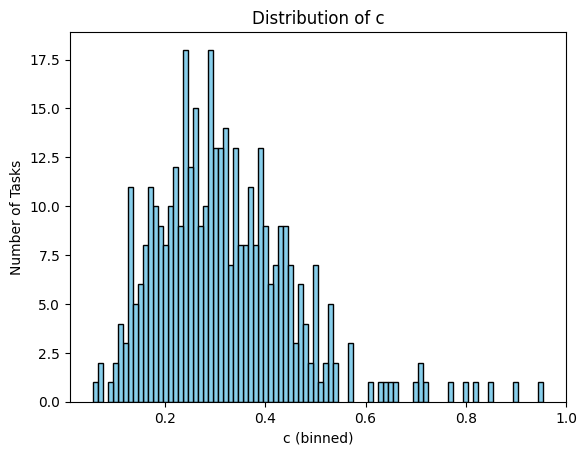

In [10]:
task_c = {}
for task in df['task_id'].unique():
    if not (0 <= task_params_dict[task]["c"] <= 1):
        continue
    acc = task_params_dict[task]["c"]
    task_c[np.round(acc, 2)] = task_c.get(np.round(acc, 2), 0) + 1

plt.bar(task_c.keys(), task_c.values(), width=0.01, color='skyblue', edgecolor='black')
plt.xlabel('c (binned)')
plt.ylabel('Number of Tasks')
plt.title('Distribution of c')

# find 33%, 66% quantiles of c
c_values = sorted([task_params_dict[task]["c"] for task in df['task_id'].unique() if 0 <= task_params_dict[task]["c"] <= 1])
q33 = np.percentile(c_values, 100/3)
q66 = np.percentile(c_values, 200/3)
print(f"33% quantile of c: {q33:.3f}")
print(f"66% quantile of c: {q66:.3f}")

136 tasks with c in (0, 0.25]
120 tasks with c in (0.25, 0.35]
143 tasks with c in (0.35, 1]
136 tasks with c in (0, 0.25]
120 tasks with c in (0.25, 0.35]
143 tasks with c in (0.35, 1]


C:\Users\marin\AppData\Local\Temp\ipykernel_7508\1534527907.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([d["initial_accuracy"] for d in data.values()],


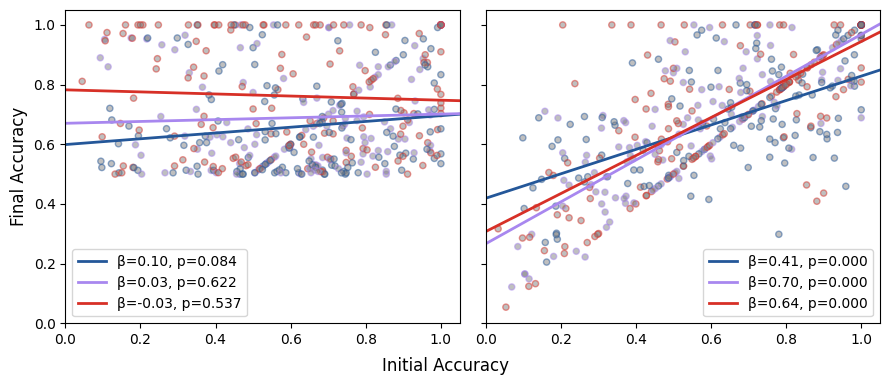

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)

# remove ticks for ax2
# ax2.tick_params(labelleft=False)
# cax = fig.add_subplot(gs[0, 2])

# bounds = [0, q33, q66, 1]
bounds = [0, 0.25, 0.35, 1]
# bounds = [0, 0.2, 0.3, 1]
stables = initial_final_accuracy_scatter_plot(condition=0, ax=ax[0], plot_colormap=False, bounds=bounds, size=20)
_ = initial_final_accuracy_scatter_plot(condition=1, ax=ax[1], plot_colormap=False, bounds=bounds, size=20)

ax[0].set_xlabel("")          # optional
ax[1].set_xlabel("")          # optional
ax[1].set_ylabel("")          # optional

fig.supxlabel("Initial Accuracy", y=0.05, fontsize=12)
# fig.supylabel("Final Accuracy")

plt.tight_layout()
plt.savefig('plots/WOC/initial_final_accuracy.png', dpi=300)
plt.show()

## Skewness

In [12]:
def skewness_plot_condition(ax=None, 
                            color1='black', color2='navy', color_diff='darkred',
                            label1='Control median', label2='Control mean', label_diff=None,
                            func_y1=lambda params: params['scores'][0],
                            func_y2=lambda params: params['scores_avg'][0],
                            xlabel=None, ylabel=None, ylabel_diff=None,
                            base=dict()):
    if ax is None:
        f, ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

    my_base = dict(func_x=lambda task: abs(task_params_dict[task]['skewness']),
                    show_means=False, 
                    annotate_domain_means=False, 
                    s_task=8, alpha_task=0.4,
                    alpha_grid=0,
                    fit_on="all"
                    )
    my_base.update(base)

    plot_tasks_vs_mu_c(**my_base,
                       func_y=func_y1,
                       ax=ax[0], label=label1, color=color1, fit_label=0,
                       xlabel=None, ylabel=None)

    plot_tasks_vs_mu_c(**my_base,
                       func_y=func_y2,
                        ax=ax[0] if len(ax) == 2 else ax[1], label=label2, color=color2, fit_label=0,
                        xlabel=None, ylabel=ylabel)
    
    plot_tasks_vs_mu_c(**my_base,
                       func_y=lambda x: func_y2(x) - func_y1(x),
                        ax=ax[1] if len(ax) == 2 else ax[2], label=label_diff, color=color_diff, show_zero_line=1,
                        xlabel=xlabel, ylabel=ylabel_diff)



c:\Users\marin\Documents\SDU\sic_dataset\to_zip\code\dataset_functions.py:734: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


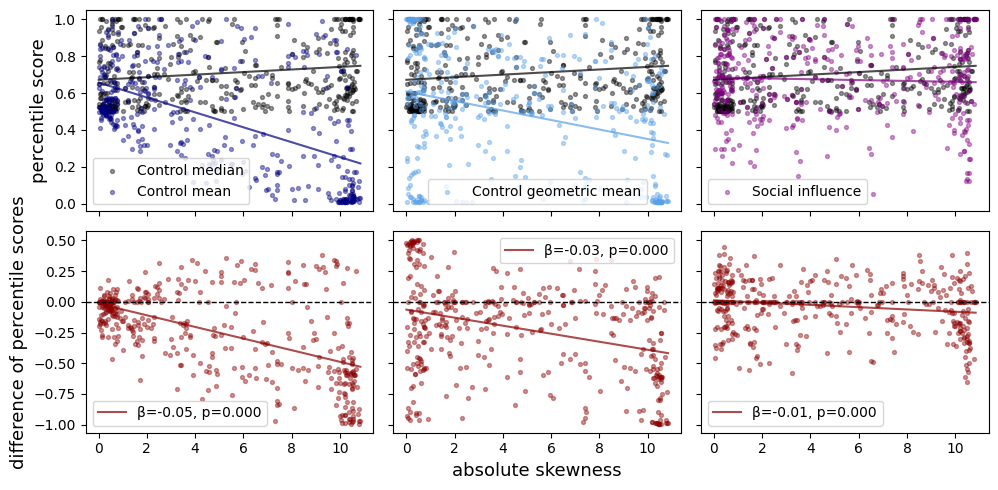

In [13]:
f, ax = plt.subplots(2, 3, figsize=(10, 5), sharex=True, sharey='row')
size = 8
fontsize=13
skewness_plot_condition(ax=ax[:,0], color1='black', color2='navy', color_diff='darkred',
                        ylabel='percentile score', base=dict(ylabel_fontsize=fontsize), ylabel_diff="difference of percentile scores")

skewness_plot_condition(ax=ax[:,1], color1='black', color2='#58A0E8', color_diff='darkred',
                        func_y2=lambda params: params['scores_gmean'][0],
                        label1=None,
                        label2='Control geometric mean', xlabel="absolute skewness", base=dict(xlabel_fontsize=fontsize))

skewness_plot_condition(ax=ax[:,2], color1='black', color2='purple', color_diff='darkred',
                        label1=None,
                        func_y2=lambda params: params['scores'][1],
                        label2='Social influence')
plt.tight_layout()    
plt.savefig("plots/WOC/skewness_vs_scores_no_color.png", dpi=300)
plt.show()


## Condition optimality boxplot

In [14]:
def condition_differences_full(func1=lambda d: [task_params_dict[task_id]["scores"][0] for task_id in df[df['domain_name'] == d]['task_id'].unique()],
                               func2=lambda d: [task_params_dict[task_id]["scores_avg"][0] for task_id in df[df['domain_name'] == d]['task_id'].unique()], 
                               color1="black", color2="navy", diff_color="darkred",
                               label1="Control median", label2="Control mean",
                               ylabel1="percentile score", ylabel2="difference in percentile score",
                               saveto=None):
    domain_names = domains_ordered_by_c
    f, ax = plt.subplots(2, 1, figsize=(9,6), sharex=True)
    x = [3*i for i in range(len(domain_names))]

    myboxplot(x=x, vals=domain_names,
            func=func1,
            xlabels=None, ax=ax[0], box_color=color1, dots_colors=color1, label=label1)
    myboxplot(x=np.array(x) + 0.8, vals=domain_names,
            func=func2,
            xlabels=None, ax=ax[0], box_color=color2, dots_colors=color2, ylabel=ylabel1, label=label2)

    myboxplot(x=np.array(x) + 0.4, vals=domain_names,
            func=lambda d: np.array(func2(d)) - np.array(func1(d)),
            xlabels=[d.replace("_", " ") for d in domain_names], ax=ax[1], box_color=diff_color, dots_colors=diff_color, show_zero_line=True, ylabel=ylabel2,
            label="Difference")

    plt.tight_layout()
    if saveto is not None:
        plt.savefig(saveto, dpi=300)
    plt.show()

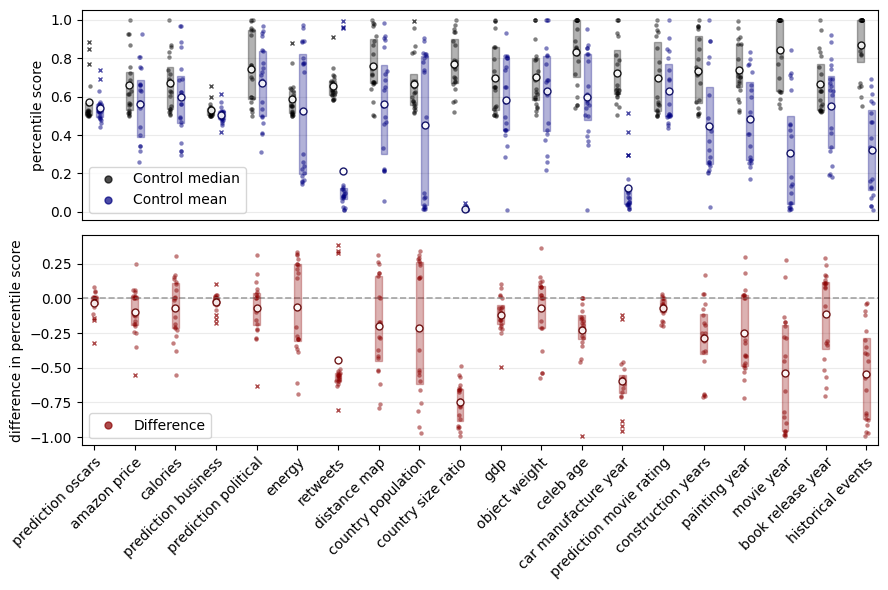

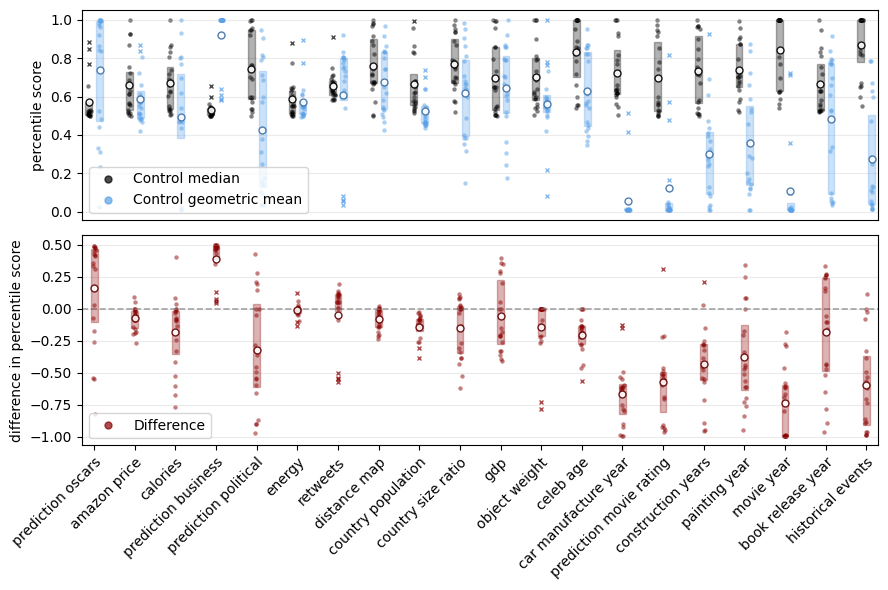

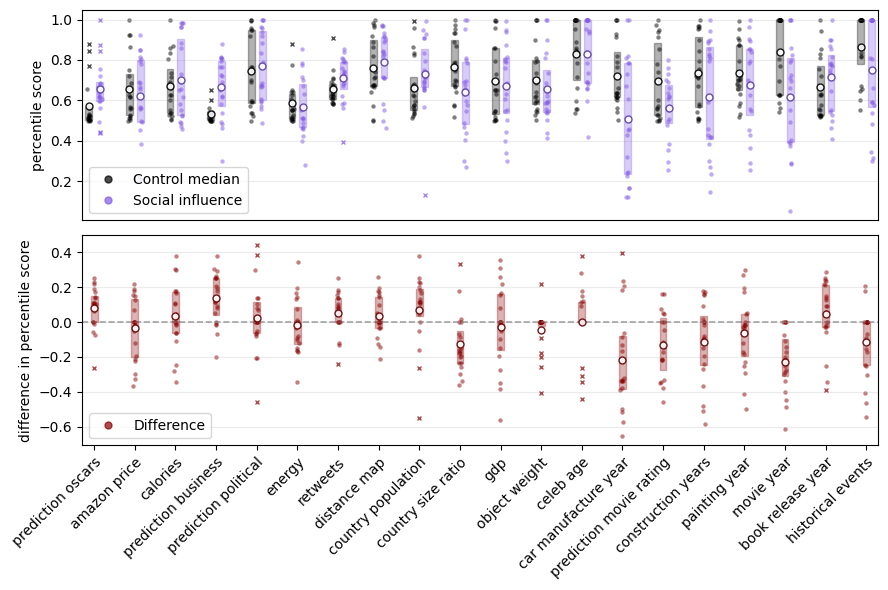

In [15]:
condition_differences_full(saveto="plots/WOC/control_median_vs_mean.png")
condition_differences_full(func2=lambda d: [task_params_dict[task_id]["scores_gmean"][0] for task_id in df[df['domain_name'] == d]['task_id'].unique()],
                          color2="#58A0E8", label2="Control geometric mean",
                          saveto="plots/WOC/control_median_vs_gmean.png")
condition_differences_full(func2=lambda d: [task_params_dict[task_id]["scores"][1] for task_id in df[df['domain_name'] == d]['task_id'].unique()],
                            color2="#8158E8", label2="Social influence",
                            saveto="plots/WOC/control_median_vs_consensus.png")